# Setting Environment

In [1]:
!pip install python-dotenv -q

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# from dotenv import load_dotenv
# load_dotenv("creds.env")
# project_path = os.getenv("PROJECT_PATH")

project_path = "/content/drive/Othercomputers/My Laptop (1)/Freelance Work 2024(End)/Ehsanullah Tehsin/Dissertation (Image Captioning)/Implementation"
os.chdir(project_path)

In [4]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for string operations
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag, FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter

# Libraries for Image operations
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage import feature, io, color

In [5]:
# Downloading essential things of NLTK
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Loading Data

In [6]:
# Function to read Caption file
def load_captions(captions_file):
    # Loading the captions into a DataFrame
    return pd.read_csv(captions_file, delimiter=',')

In [7]:
# Function to Load data
def load_dataset(image_dir, captions_df):

    # Dictionary to store the images and captions
    dataset = {}

    # Looping through the DataFrame and load images
    for index, row in tqdm(captions_df.iterrows()):
        image_path = os.path.join(image_dir, row['image'])
        try:
            image = Image.open(image_path)
            # Store the image and caption in the dictionary
            dataset[row['image']] = {'image': image, 'caption': row['caption']}
        except IOError:
            print(f"Error opening {image_path}")

    return dataset

In [8]:
image_dir = 'data/Images'
captions_file = 'data/captions.txt'

# Loading captions
captions_df = load_captions(captions_file).sample(10000)

# Loading the dataset
dataset = load_dataset(image_dir, captions_df)
print("Dataset loaded successfully.")

10000it [29:58,  5.56it/s]

Dataset loaded successfully.


# Data Exploration

In [9]:
# Display basic information about the dataset
print("Basic Information:")
print(captions_df.info())

# Display the first few rows of the dataset
print("\nFirst few captions:")
captions_df.head()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3710 to 32506
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    10000 non-null  object
 1   caption  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB
None

First few captions:


,image,caption
3710,1813777902_07d1d4b00c.jpg,a boy dressed as a pirate smiles largley .
10596,2510197716_fddca0ac75.jpg,A girl is swinging on an object that is red wi...
14858,2800758232_d7fa598065.jpg,Two people looking at a rocky view
34047,3673165148_67f217064f.jpg,A dog standing on a beach .
1410,1312020846_5abb4a9be2.jpg,Two little puppies chase each other on a stone...


In [10]:
# Create a single string with all captions
all_captions = ' '.join(captions_df['caption'].tolist()).lower()

# Calculate the total number of words in the captions
words = all_captions.split()
print(f"\nTotal number of words in captions: {len(words)}")


Total number of words in captions: 117883


In [11]:
# Calculate the number of unique words
unique_words = set(words)
print(f"Number of unique words: {len(unique_words)}")

# Most common words
word_counts = Counter(words)
most_common = word_counts.most_common(10)
print("\nMost common words:")
print(most_common)

Number of unique words: 4816

Most common words:
[('a', 15569), ('.', 9067), ('the', 4691), ('in', 4601), ('on', 2689), ('is', 2273), ('and', 2223), ('dog', 2115), ('with', 1920), ('man', 1747)]


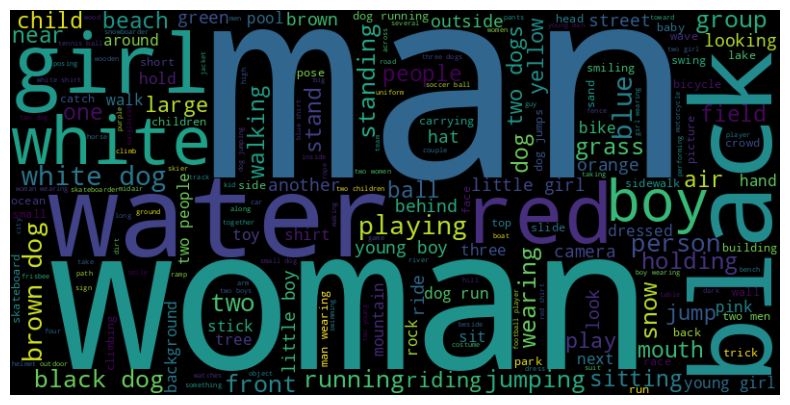

In [12]:
# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_captions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

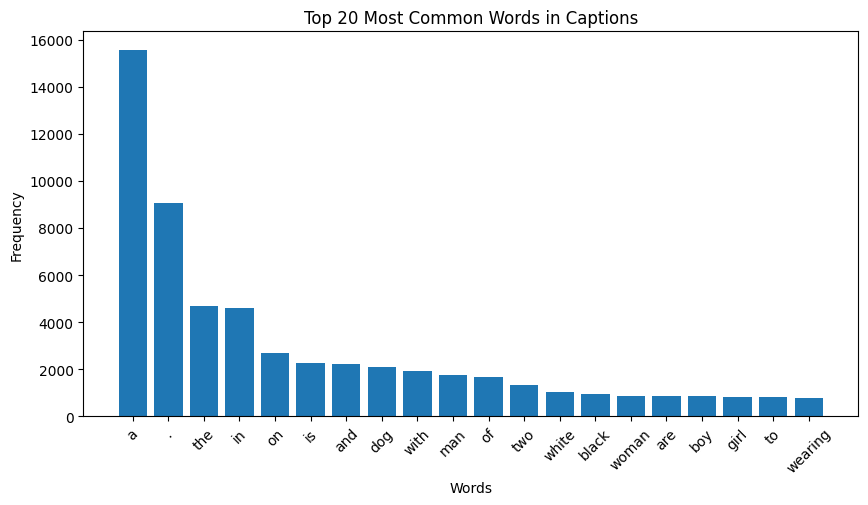

In [13]:
# Plot the frequency of the most common words
top_words = word_counts.most_common(20)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_words))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Captions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [14]:
# NLTK Stop words
stop_words = set(stopwords.words('english'))
# Add any additional stopwords or symbols to filter
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '...'])

# Split into words and filter out stopwords and punctuation
words = [word for word in all_captions.split() if word not in stop_words and word not in string.punctuation]

# Calculate the total number of words in the filtered captions
print(f"\nTotal number of words in filtered captions: {len(words)}")

# Calculate the number of unique words
unique_words = set(words)
print(f"Number of unique words: {len(unique_words)}")

# Most common words
word_counts = Counter(words)
most_common = word_counts.most_common(20)
print("\nMost common words after filtering stopwords and symbols:")
print(most_common)


Total number of words in filtered captions: 62151
Number of unique words: 4707

Most common words after filtering stopwords and symbols:
[('dog', 2115), ('man', 1747), ('two', 1336), ('white', 1035), ('black', 938), ('woman', 885), ('boy', 848), ('girl', 838), ('wearing', 761), ('people', 713), ('water', 681), ('brown', 645), ('red', 635), ('young', 615), ('blue', 573), ('dogs', 519), ('running', 493), ('playing', 488), ('little', 451), ('shirt', 441)]


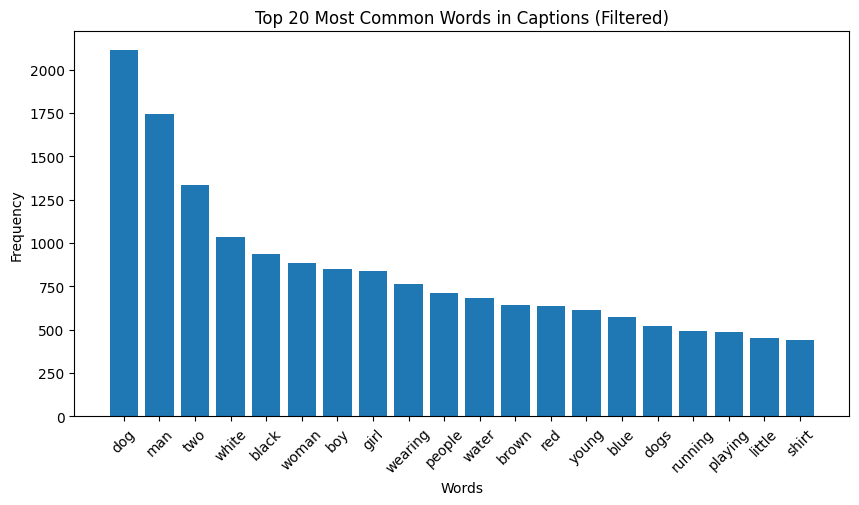

In [15]:
# Plot the frequency of the most common words
plt.figure(figsize=(10, 5))
plt.bar(*zip(*most_common))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Captions (Filtered)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Frequency of Parts of Speech:


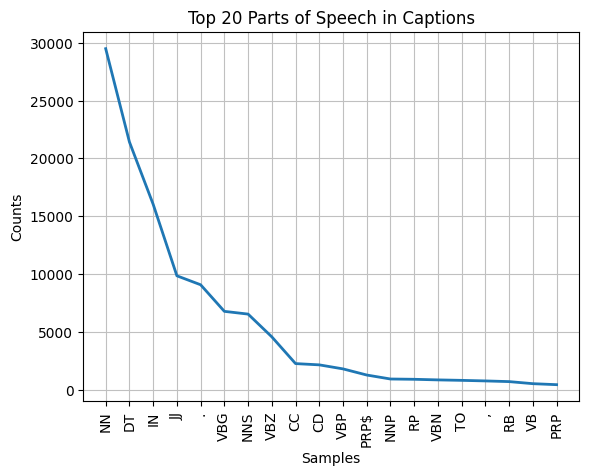

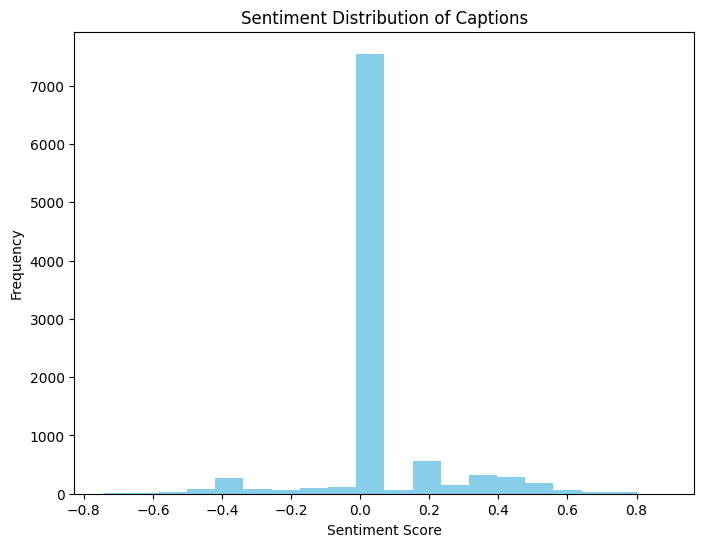

Average Sentiment Score: 0.03


In [16]:
def explore_advanced_features(captions_df):

    sid = SentimentIntensityAnalyzer()

    # Adding advanced linguistic analysis to the DataFrame
    captions_df['tokens'] = captions_df['caption'].apply(word_tokenize)
    captions_df['pos_tags'] = captions_df['tokens'].apply(pos_tag)

    # Extracting nouns, adjectives, and verbs
    captions_df['nouns'] = captions_df['pos_tags'].apply(lambda tags: [word for word, tag in tags if tag.startswith('NN')])
    captions_df['adjectives'] = captions_df['pos_tags'].apply(lambda tags: [word for word, tag in tags if tag.startswith('JJ')])
    captions_df['verbs'] = captions_df['pos_tags'].apply(lambda tags: [word for word, tag in tags if tag.startswith('VB')])

    # Analyzing sentiment
    captions_df['sentiment_scores'] = captions_df['caption'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # Frequency distribution of parts of speech
    pos_counts = FreqDist(tag for wordlist in captions_df['pos_tags'] for _, tag in wordlist)
    print("\nFrequency of Parts of Speech:")
    pos_counts.plot(20, title="Top 20 Parts of Speech in Captions")

    # Plotting sentiment distribution
    plt.figure(figsize=(8, 6))
    plt.hist(captions_df['sentiment_scores'], bins=20, color='skyblue')
    plt.title('Sentiment Distribution of Captions')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

    # Average sentiment score
    avg_sentiment = captions_df['sentiment_scores'].mean()
    print(f"Average Sentiment Score: {avg_sentiment:.2f}")

explore_advanced_features(captions_df)

Image: 1813777902_07d1d4b00c.jpg
Caption: a boy dressed as a pirate smiles largley .


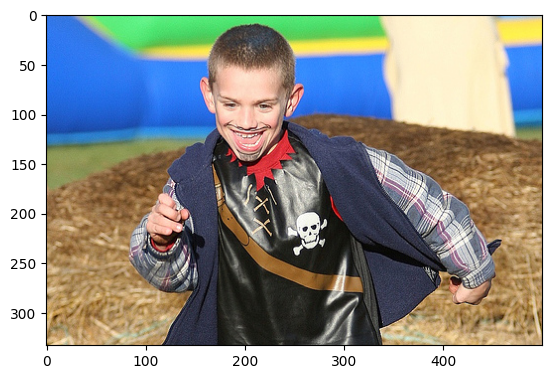

In [17]:
# Displaying an example
image_name = list(dataset.keys())[0]
image = dataset[image_name]['image']
caption = dataset[image_name]['caption']

# Display the image and caption
print("Image:", image_name)
print("Caption:", caption)
plt.imshow(image)
plt.show()

Average Image Width: 457.87 pixels
Average Image Height: 397.20 pixels


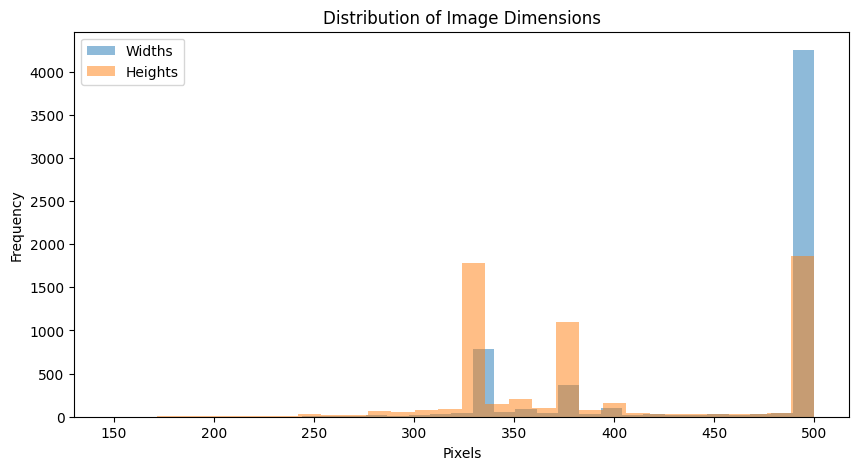

In [18]:
def analyze_images(dataset):
    # Analyzing image dimensions
    widths, heights = [], []
    for info in dataset.values():
        img = info['image']
        widths.append(img.width)
        heights.append(img.height)

    # Displaying average dimensions
    print(f"Average Image Width: {np.mean(widths):.2f} pixels")
    print(f"Average Image Height: {np.mean(heights):.2f} pixels")

    # Plotting the distribution of image dimensions
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=30, alpha=0.5, label='Widths')
    plt.hist(heights, bins=30, alpha=0.5, label='Heights')
    plt.title('Distribution of Image Dimensions')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

analyze_images(dataset)

In [19]:
import pickle

# Save the dataset dictionary to a file
with open('dataset.pkl', 'wb') as f:
  pickle.dump(dataset, f)



# Data Preparation

In [7]:
import pickle

# To load the dataset later:
with open('dataset.pkl', 'rb') as f:
  dataset = pickle.load(f)

## Text Preprocessing

In [8]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Function to clean the captions
def clean_caption(caption):
    caption = caption.lower()
    caption = re.sub(r"[^a-zA-Z0-9]+", ' ', caption)
    caption = 'startseq ' + caption + ' endseq'
    return caption

# Clean all captions in the dataset
for key in dataset:
    dataset[key]['caption'] = clean_caption(dataset[key]['caption'])

# Tokenize the captions
captions = [dataset[key]['caption'] for key in dataset]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

# Convert captions to sequences of tokens and pad them
max_length = max(len(tokenizer.texts_to_sequences([caption])[0]) for caption in captions)
print("Maximum caption length:", max_length)

for key in dataset:
    sequence = tokenizer.texts_to_sequences([dataset[key]['caption']])[0]
    dataset[key]['sequence'] = pad_sequences([sequence], maxlen=max_length, padding='post')[0]

Vocabulary size: 3873
Maximum caption length: 33


## Image Preprocessing

In [9]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np
from PIL import Image
from tqdm import tqdm

# Load the VGG16 model pre-trained on ImageNet
vgg_model = VGG16(weights='imagenet')
feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)

# Function to preprocess images
def preprocess_image(image):
    # Resize the image
    image = image.resize((224, 224))

    # Convert the image to array
    image = img_to_array(image)

    # Expand dimensions to match the input shape of the model
    image = np.expand_dims(image, axis=0)

    # Preprocess the image
    image = preprocess_input(image)
    return image

# Prepare a batch of images
batch_size = 64
image_keys = list(dataset.keys())
num_batches = len(image_keys) // batch_size + (1 if len(image_keys) % batch_size != 0 else 0)

# Iterate through batches
for i in tqdm(range(num_batches)):
    batch_keys = image_keys[i * batch_size:(i + 1) * batch_size]
    batch_images = np.vstack([preprocess_image(dataset[key]['image']) for key in batch_keys])

    # Extract features for the batch
    batch_features = feature_extractor.predict(batch_images, verbose=0)

    # Assign the features back to the dataset
    for j, key in enumerate(batch_keys):
        dataset[key]['features'] = batch_features[j]

print("Feature extraction completed.")

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


100%|██████████| 96/96 [15:07<00:00,  9.46s/it]

Feature extraction completed.


# Modeling

## Model Training

In [10]:
# from keras.models import Model
# from keras.layers import Input, Dense, Embedding, LSTM, Dropout, add
# from keras.regularizers import l2

# # Define the CNN feature extractor model
# image_input = Input(shape=(4096,))
# image_features = Dropout(0.5)(image_input)
# image_features = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(image_features)

# # Define the sequence model
# sequence_input = Input(shape=(max_length,))
# sequence_features = Embedding(vocab_size, 256, mask_zero=True)(sequence_input)
# sequence_features = Dropout(0.5)(sequence_features)
# sequence_features = LSTM(256, kernel_regularizer=l2(0.01))(sequence_features)

# # Combine the CNN and LSTM models
# decoder = add([image_features, sequence_features])
# decoder = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(decoder)
# outputs = Dense(vocab_size, activation='softmax')(decoder)

# # Define the final model
# model = Model(inputs=[image_input, sequence_input], outputs=outputs)
# model.compile(loss='categorical_crossentropy', optimizer='adam')
# model.summary()

In [11]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, LSTM, Dropout, add
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the CNN feature extractor model
image_input = Input(shape=(4096,))
image_features = Dropout(0.6)(image_input)
image_features = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(image_features)

# Define the sequence model
sequence_input = Input(shape=(max_length,))
sequence_features = Embedding(vocab_size, 256, mask_zero=True)(sequence_input)
sequence_features = Dropout(0.6)(sequence_features)
sequence_features = LSTM(256, kernel_regularizer=l2(0.01),use_cudnn=False, recurrent_regularizer=l2(0.01))(sequence_features)

# Combine the CNN and LSTM models
decoder = add([image_features, sequence_features])
decoder = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(decoder)
outputs = Dense(vocab_size, activation='softmax')(decoder)

# Define the final model
model = Model(inputs=[image_input, sequence_input], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 33)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 4096)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 33, 256)        │        991,488 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 4096)           │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 33, 256)        │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 33)             │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │      1,048,832 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 256)            │        525,312 │ dropout_1[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256)            │              0 │ dense[0][0],           │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │         65,792 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 3873)           │        995,361 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,626,785 (13.84 MB)

 Trainable params: 3,626,785 (13.84 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Prepare the data for training and testing
def create_sequences(tokenizer, max_length, dataset):
    X1, X2, y = [], [], []
    for key in dataset:
        seq = dataset[key]['sequence']
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            X1.append(dataset[key]['features'])
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

# Create sequences for the entire dataset
X1, X2, y = create_sequences(tokenizer, max_length, dataset)

# Split the data into training and testing sets
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.2, random_state=42)

In [13]:
# Train the model on the training set
history = model.fit([X1_train, X2_train], y_train, epochs=20, batch_size=64, validation_data=([X1_test, X2_test], y_test), verbose=1, callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 278s 113ms/step - loss: 3.4292 - val_loss: 1.8610
Epoch 2/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 263s 108ms/step - loss: 1.7578 - val_loss: 1.7192
Epoch 3/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 268s 110ms/step - loss: 1.6334 - val_loss: 1.6685
Epoch 4/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 264s 109ms/step - loss: 1.5547 - val_loss: 1.6484
Epoch 5/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 265s 109ms/step - loss: 1.4943 - val_loss: 1.6475
Epoch 6/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 262s 108ms/step - loss: 1.4568 - val_loss: 1.6342
Epoch 7/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 264s 108ms/step - loss: 1.4314 - val_loss: 1.6454
Epoch 8/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 265s 109ms/step - loss: 1.4047 - val_loss: 1.6474
Epoch 9/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 262s 108ms/step - loss: 1.3987 - val_loss: 1.6480
Epoch 10/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 263s 108ms/step - loss: 1.3828 - val_loss: 1.6564
Epoch 11/20
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 271s 111ms/step - loss: 1.3829 - val

## Saving Methods for Web APP

In [22]:
import pickle
from keras.models import load_model

# Save the trained model
model.save('image_captioning_model.keras')
feature_extractor.save('feature_extractor.keras')

import joblib
# Save the tokenizer
with open('tokenizer.pkl', 'wb') as file:
    joblib.dump(tokenizer, file)


# For example, you might want to save max_length and vocab_size
with open('config.pkl', 'wb') as file:
    joblib.dump({'max_length': max_length, 'vocab_size': vocab_size}, file)

print("Model, tokenizer, and configuration saved successfully.")

Model, tokenizer, and configuration saved successfully.


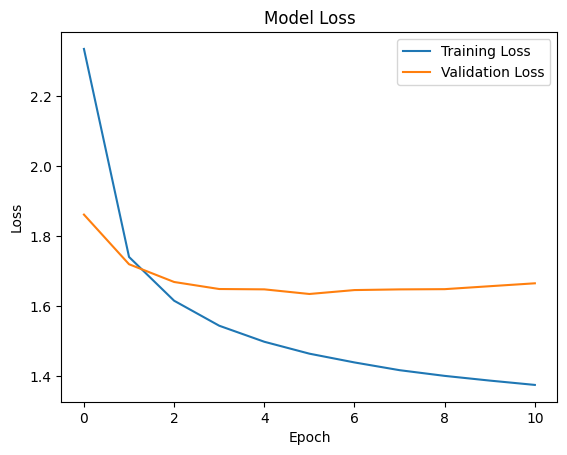

In [15]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Evaluation

In [16]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([np.expand_dims(photo, axis=0), sequence], verbose=0)
        yhat = np.argmax(yhat)

        # Check if the predicted index is in the tokenizer's index_word dictionary
        word = tokenizer.index_word.get(yhat)
        if word is None:
            break

        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text

In [17]:
import random

# Function to generate captions for a sample of test images
def generate_captions_for_samples(model, tokenizer, dataset, max_length, X1_test, num_samples=10):
    results = []
    for i in range(num_samples):
        idx = random.randint(0, len(X1_test) - 1)
        features = X1_test[idx]
        actual_caption = None
        image_name = None
        for key in dataset:
            if np.array_equal(dataset[key]['features'], features):
                actual_caption = dataset[key]['caption']
                image_name = key
                break
        predicted_caption = generate_desc(model, tokenizer, features, max_length)
        predicted_caption = predicted_caption.split()
        predicted_caption = ' '.join(predicted_caption[1:-1])
        results.append({"Image": image_name, "Actual Caption": actual_caption, "Predicted Caption": predicted_caption})
    return results

# Generate captions for 10 random samples from the test set
sample_captions = generate_captions_for_samples(model, tokenizer, dataset, max_length, X1_test, num_samples=10)

# Convert the results to a pandas DataFrame
df_pred = pd.DataFrame(sample_captions)
df_pred["Actual Caption"] = df_pred["Actual Caption"].apply(lambda x: x.split()[1:-1])
df_pred["Actual Caption"] = df_pred["Actual Caption"].apply(lambda x: ' '.join(x))
df_pred

,Image,Actual Caption,Predicted Caption
0,3533660418_f3a73a257c.jpg,three men sit on a bench outside,a man in a man is on a red and a man is on a c...
1,525887861_4cc7a1beca.jpg,a young blonde girl tries to ride a skateboard,a boy is a girl is on a red shirt is on a red ...
2,2088120475_d6318364f5.jpg,five cold people in the snowstorm one wearing ...,a man in a man is in a red shirt is in a red s...
3,2406591500_403f145905.jpg,two boys are running on a path amoung green le...,a man is on a red shirt is on a red shirt is o...
4,488408004_a1e26d4886.jpg,a young boy wearing a light blue jacket walks ...,a boy is in a red shirt is in a red shirt is i...
5,3274879561_74997bbfff.jpg,doe jumps over wood and wire fence,a dog is running on a field
6,3286111436_891ae7dab9.jpg,a basketball player for north carolina moves w...,a man in a basketball
7,2858759108_6e697c5f3e.jpg,a white greyhound wearing a yellow and black j...,a man is running on a field
8,3241487502_f4f0cc4a8a.jpg,two white dogs playing in a forest,a dog is running on a field
9,1415591512_a84644750c.jpg,little girl moving quickly on grass beside sil...,a boy is a blue shirt is on a red shirt is on ...


In [18]:
# Generate captions for 10 random samples from the test set
sample_captions = generate_captions_for_samples(model, tokenizer, dataset, max_length, X1_train, num_samples=50)

# Convert the results to a pandas DataFrame
df_pred_train = pd.DataFrame(sample_captions)
df_pred_train["Actual Caption"] = df_pred_train["Actual Caption"].apply(lambda x: x.split()[1:-1])
df_pred_train["Actual Caption"] = df_pred_train["Actual Caption"].apply(lambda x: ' '.join(x))
df_pred_train

,Image,Actual Caption,Predicted Caption
0,3430100177_5864bf1e73.jpg,many people are standing outside on a street f...,a man in a man is on a red shirt of a man in a...
1,241345844_69e1c22464.jpg,a football player is talking to his coach,a man in a red player in a red and a man in a ...
2,397547349_1fd14b95af.jpg,a man walking down a sidewalk with 2 dogs on l...,a dog is running on a field
3,1122944218_8eb3607403.jpg,baby in white outfit holding black and white flag,a girl is a blue shirt is a red shirt is on a ...
4,3697456750_460aea7252.jpg,girls fighting on karate competition,a man in a man in a red shirt is in a red shir...
5,2718027742_70a72f99ae.jpg,a child seen from the waist down in a bathing ...,a boy is jumping on a blue shirt is in a blue ...
6,3492383096_5bbc08f0da.jpg,the three dogs are running around near the shore,a dog is running on a ball
7,2274992140_bb9e868bb8.jpg,two little children and one is playing with a ...,a girl is a blue shirt is on a red shirt is on...
8,265223843_9ef21e1872.jpg,a person in the sky connected to a fan,a man is riding a rock
9,2883950737_3b67d24af4.jpg,two women in bathing suits walks across the sand,a man in a blue shirt is in a blue shirt is in...


In [19]:
df_pred.to_csv('predictions.csv', index=False)
df_pred_train.to_csv('predictions_train.csv', index=False)

In [20]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

# Function to evaluate the model using BLEU scores
def evaluate_model(model, tokenizer, max_length, X1, dataset):
    actual, predicted = [], []
    for i in range(len(X1)):
        # Generate description
        yhat = generate_desc(model, tokenizer, X1[i], max_length)
        # Find the corresponding actual caption
        for key in dataset:
            if np.array_equal(dataset[key]['features'], X1[i]):
                actual_caption = dataset[key]['caption']
                break
        # Store actual and predicted
        references = [actual_caption.split()]
        actual.append(references)
        predicted.append(yhat.split())
    # Calculate BLEU scores
    smoothie = SmoothingFunction().method4
    bleu1 = corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu3 = corpus_bleu(actual, predicted, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smoothie)
    bleu4 = corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)
    return bleu1, bleu2, bleu3, bleu4

# Evaluate the model on a subset of the test set
subset_size = 100
bleu1, bleu2, bleu3, bleu4 = evaluate_model(model, tokenizer, max_length, X1_test[:subset_size], dataset)
print('BLEU-1: %f' % bleu1)
print('BLEU-2: %f' % bleu2)
print('BLEU-3: %f' % bleu3)
print('BLEU-4: %f' % bleu4)


BLEU-1: 0.233551
BLEU-2: 0.130078
BLEU-3: 0.065193
BLEU-4: 0.030844


In [21]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohappyeyeballs                 2.3.4
aiohttp                          3.10.0
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.13
albumentations                   1.4.12
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.7.29.0.32.7
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread               